In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import itertools

# DF import

In [28]:
df = pd.read_csv('Dataframe raw.csv', sep = ';')

In [29]:
# scale features between 0 and 1
scaler = MinMaxScaler()
to_be_normalized = ['Team size min']
for factor in to_be_normalized:
    df_normalized = scaler.fit_transform(pd.DataFrame(df[factor]))
    df[factor] = pd.DataFrame(df_normalized)

In [32]:
#function to create dummies for specific features - separates 1 case into many when needed

def scatterer(impact_factors, df_scatter = pd.DataFrame(columns = list(df.columns.values))):
    '''
    Arg: impact_factors=list(df)[range] - list os labels to be scattered / df_scatter if other features were already scattered
    Out: generates cases based on Part values dividing into 'dummies' with values for each feature separated in cases with
    other features zeroed. Removes duplicates.
    '''
    if df_scatter.empty == True:
        df_base = df.copy()
    else:
        df_base = df_scatter.copy()
        df_scatter = pd.DataFrame(columns = list(df.columns.values))
    
    names = df_scatter.columns.tolist()
    
    for i in range(len(impact_factors)):
        df_dum = df_base.copy()
        df_dum_i = df_dum.loc[:,impact_factors[i]].copy() # makes a copy of the column to be saved
        df_dum.loc[:,impact_factors[:]] = 0.0 #zero every selected column
        df_dum.loc[:,impact_factors[i]] = df_dum_i #put the copied column inplace of the corresponded zeroed one
        df_scatter = pd.concat([df_scatter,df_dum], sort=True) #concat the result into the new dataframe
    df_scatter.reset_index(drop = True, inplace = True)
    df_scatter.drop_duplicates(inplace = True)
    df_scatter.reset_index(drop = True, inplace = True)
    
    for i in range(df_scatter.shape[0]): #removes zeroed lines
        if df_scatter.loc[i, impact_factors[:]].any() == 0:
            df_scatter.drop(i, inplace = True)
    
    df_scatter = df_scatter[names] #reorders columns to original order
    return df_scatter

#function to create dummies for participants, including all possible combinations of entries
def scatterer_part(impact_factors, df_scatter):
    '''
    Arg: impact_factors=list(df)[range] - list os labels to be scattered / df_scatter already correlated by scatterer
    Out: generates cases based on Part values dividing into 'special-dummies', with all possible combinatinos of values.
        Removes duplicates and rows with all Part columns = 0.
    '''
    length = len(df_scatter)
    
    names = df_scatter.columns.tolist()
    
    df_scatter_zero = df_scatter.copy()
    df_scatter_zero.loc[:,impact_factors[:-1]] = 0.0
    df_scatter = df_scatter.append(df_scatter_zero)
    
    df_base = df_scatter.iloc[:-length,:].copy()
    
    part_combinations = []
    for L in range(1, len(impact_factors[:-1])+1): #creating all possible combinations of Parts
        for subset in itertools.combinations(impact_factors[:-1], L):
            part_combinations.append(subset)
            
    for part_comb in part_combinations[:-1]:
        df_dum = df_base.copy()
        df_dum_i = df_dum.loc[:,part_comb].copy() # makes a copy of the column to be saved
        df_dum.loc[:,impact_factors[:-1]] = 0.0 #zeroes every selected column
        df_dum.loc[:,part_comb] = df_dum_i #put the copied column inplace of the corresponded zeroed one
        df_scatter = pd.concat([df_scatter,df_dum], sort=True) #concat the result into the new dataframe    
    
    df_scatter.reset_index(drop = True, inplace = True) #resets indexes to remove zeroed Parts
    zeroed_index = df_scatter[(df_scatter.loc[:,'Part Users'] == 0.) & (df_scatter.loc[:,'Part Experts'] == 0.)
                              & (df_scatter.loc[:,'Part Service staff'] == 0.) & (df_scatter.loc[:,'Part Stakeholders'] == 0.)
                              & (df_scatter.loc[:,'Part DT'] == 0)] #indexes of zeroed lines (all Parts)
    df_scatter.drop(list(zeroed_index.index.values), axis=0, inplace = True)
    df_scatter = df_scatter[names] #reorders columns to original order
    df_scatter = df_scatter.drop(['Part DT'], axis = 1) #removes unnecessary column
    df_scatter.drop_duplicates(inplace = True) #remove possible duplicates without Part DT
    df_scatter.reset_index(drop = True, inplace = True) #reset indexes final

    return df_scatter

In [34]:
DS = ['DS Discover', 'DS Define', 'DS Develop', 'DS Deliver']
IF = ['IF Incremental', 'IF Evolutive', 'IF Radical']
Part = ['Part Users', 'Part Experts', 'Part Service staff', 'Part Stakeholders', 'Part DT']

df_final = scatterer(DS, df_scatter = df)
df_final = scatterer(IF, df_scatter = df_final)
df_final = scatterer_part(Part, df_final)
df_final.loc[:,'DS Discover'] = df_final.loc[:,'DS Discover'].astype(float)

# Preliminary visualization

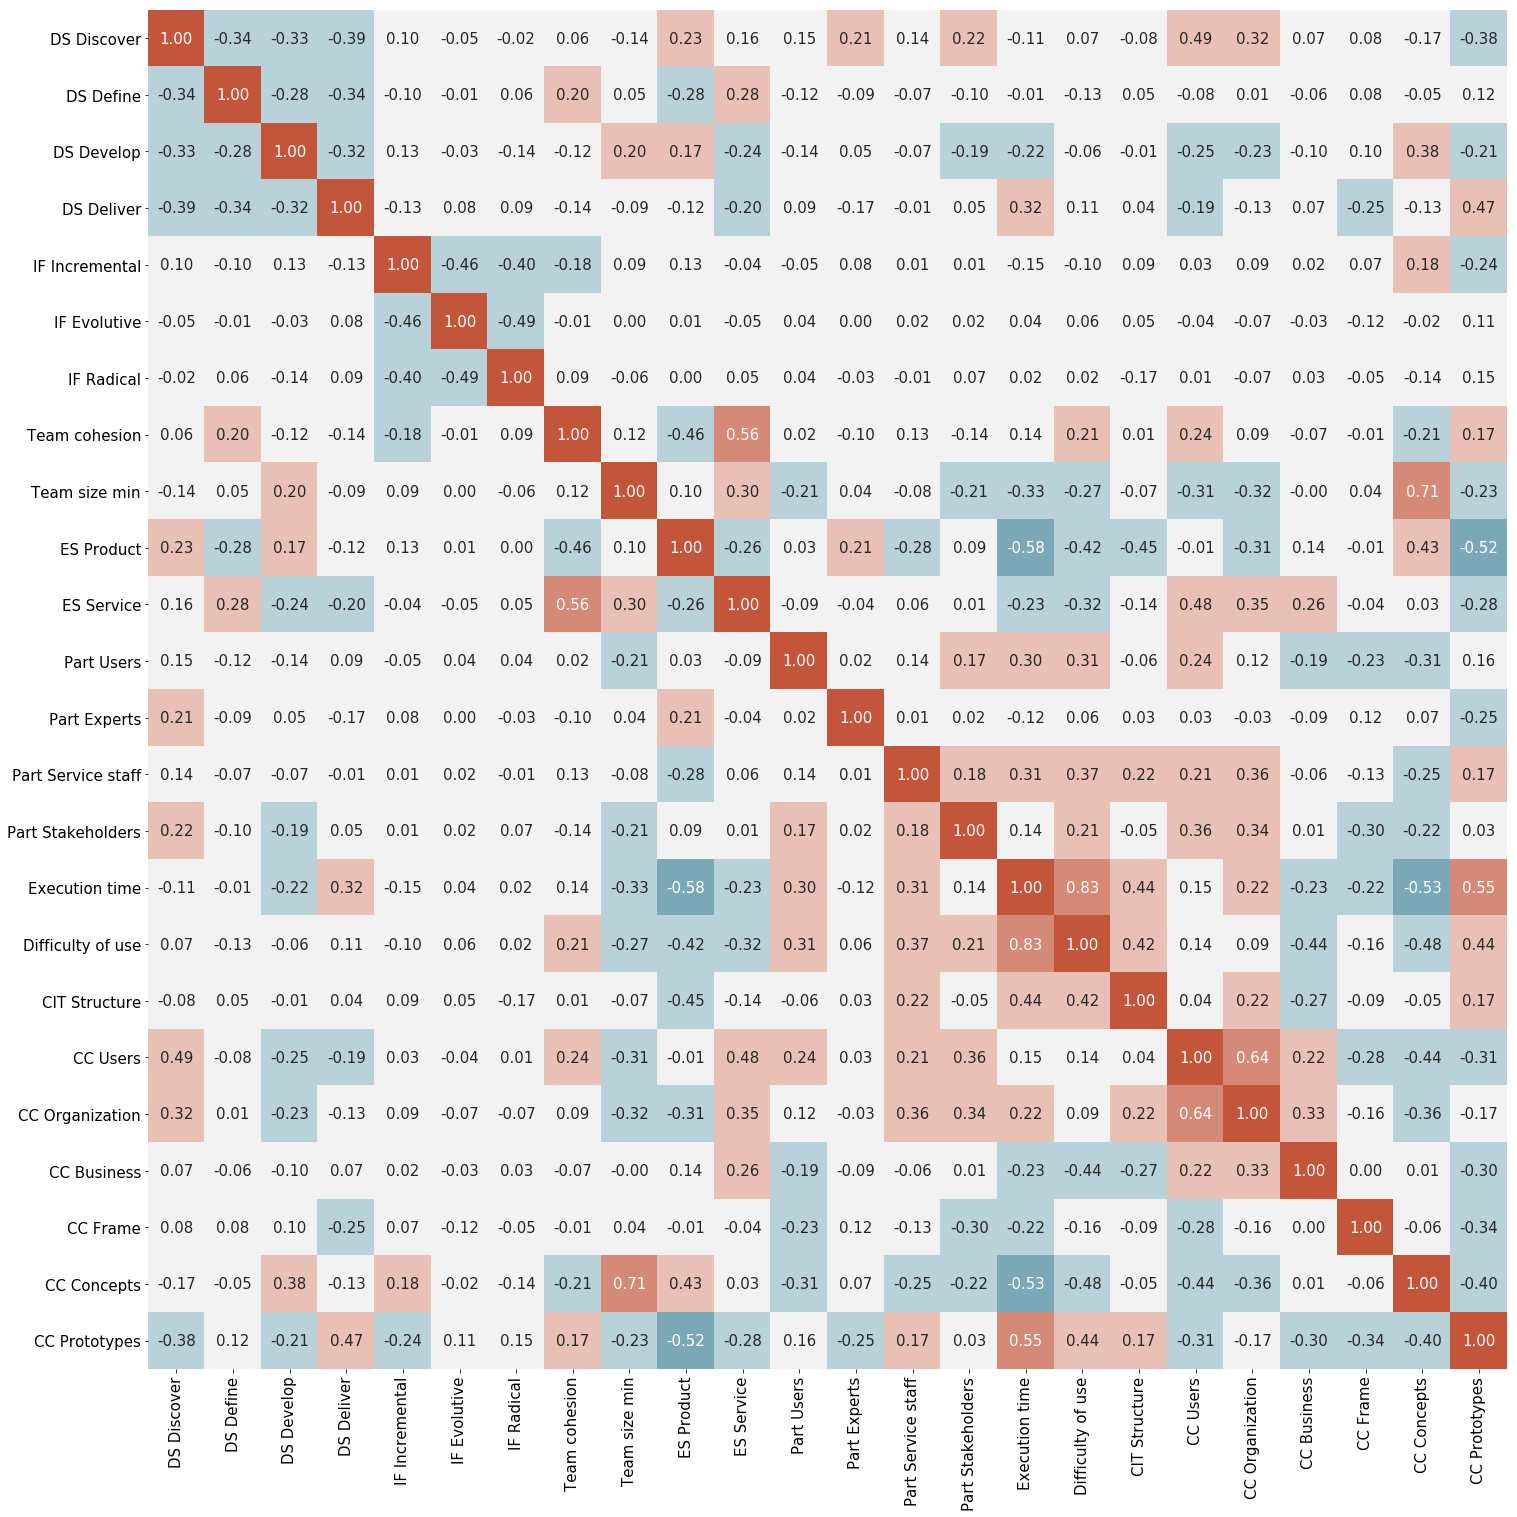

In [35]:
'''data_plot_2 = df_final.iloc[:,:]
fig, ax = plt.subplots(figsize=(25,25))
plt.rcParams.update({'font.size': 15})
sns.heatmap(data_plot_2.corr(), center=0, annot=True, cbar=False, fmt = '.2f', square = True, vmax = 1.2,
            cmap=sns.diverging_palette(220, 20, n=7))
plt.savefig('Images/heatmap_complete.png', dpi = 300, bbox_inches  = 'tight')'''

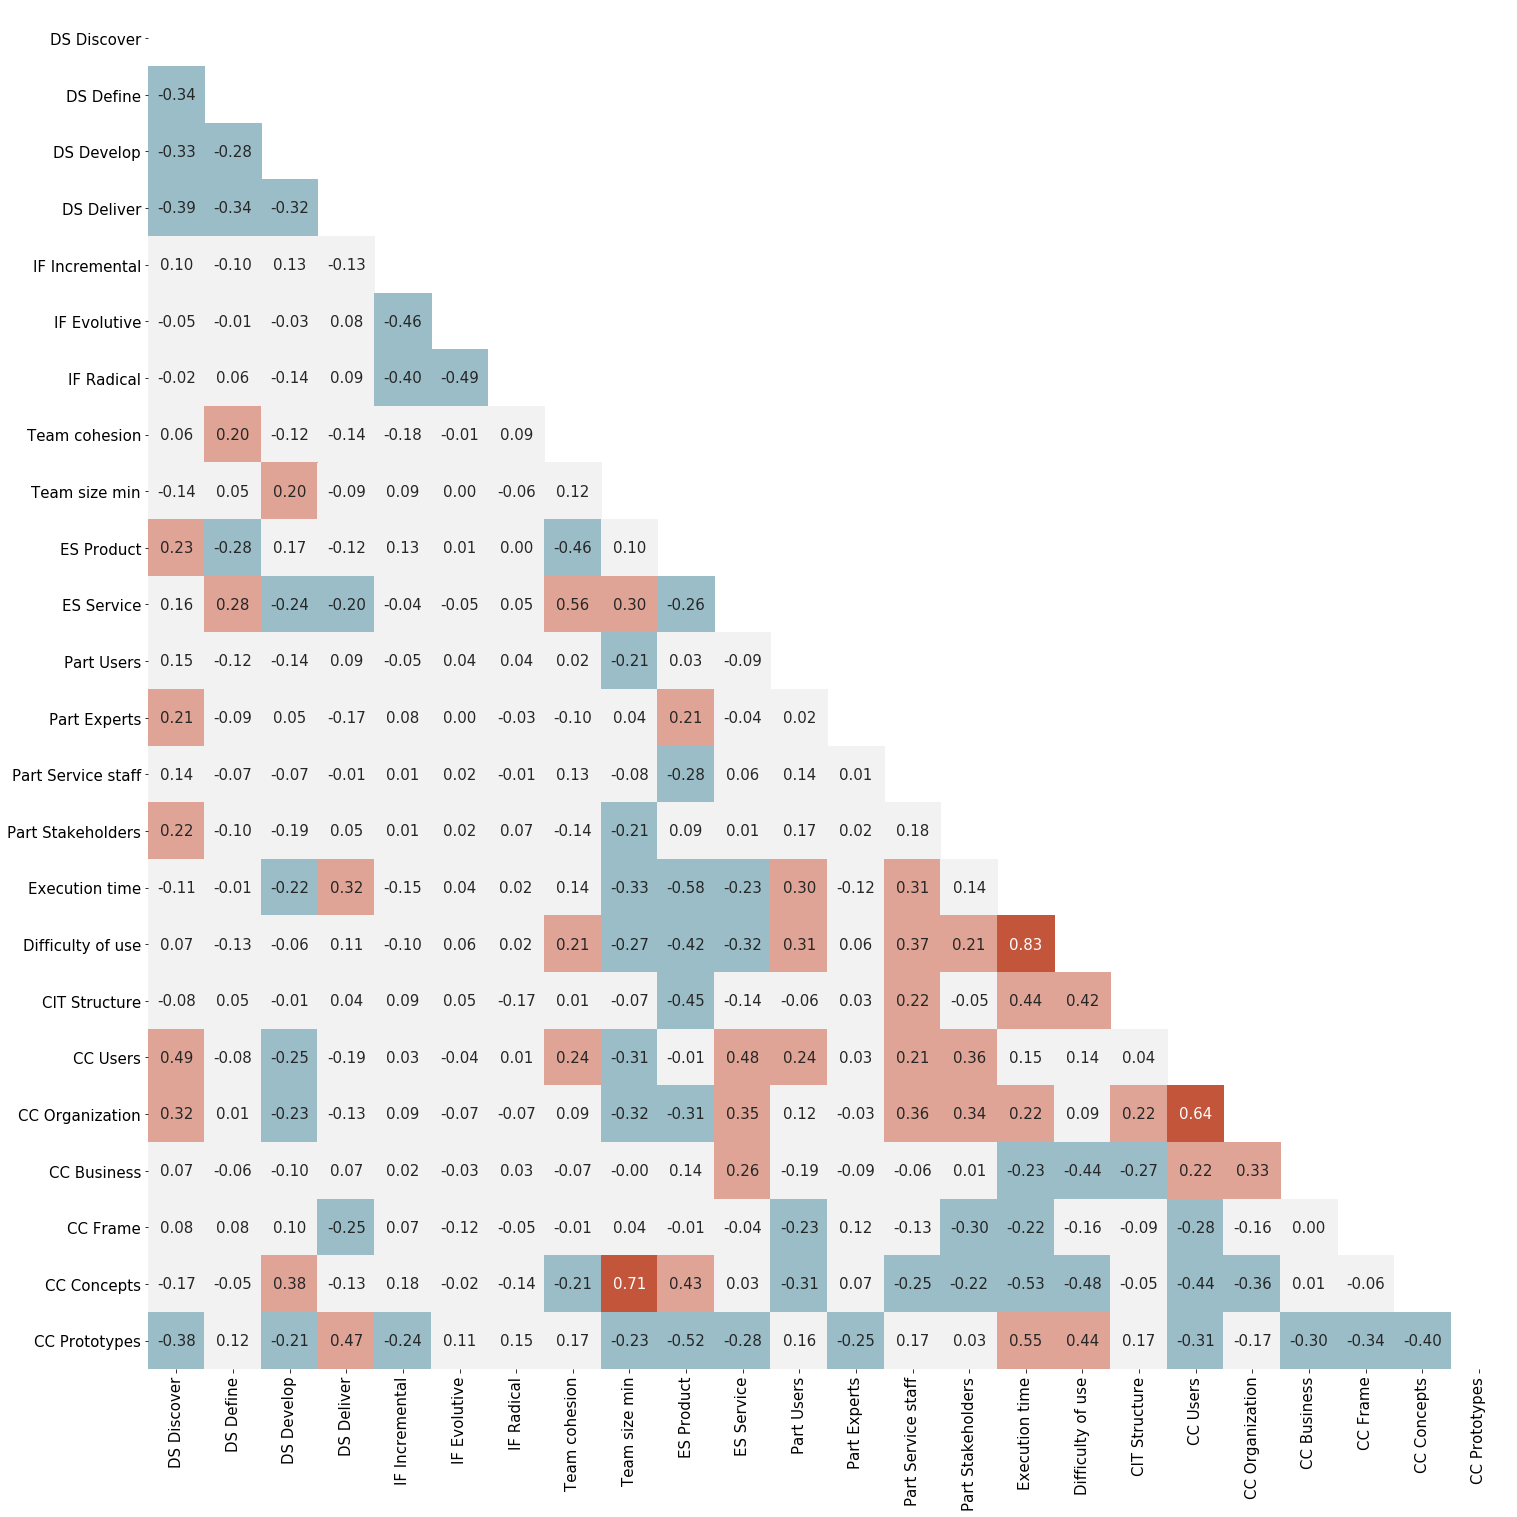

In [36]:
'''data_plot_2 = df_final.iloc[:,:]
corr = data_plot_2.corr()
fig, ax = plt.subplots(figsize=(25,25))
plt.rcParams.update({'font.size': 15})
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns_plot = sns.heatmap(corr, mask=mask, center=0, annot=True, cbar=False, fmt = '.2f', square = True, vmin = -1, vmax = 1,
            cmap=sns.diverging_palette(220, 20, n=5))
plt.savefig('Images/heatmap.png', dpi = 300, bbox_inches  = 'tight')'''

In [38]:
#print('Loaded df, df_final')

Loaded df, df_final


In [39]:
#save as final dataframe to be used in first and second stages

#df_final.to_csv('DataFrame.csv', sep = ';')